# Data Bootcamp - Final Project

## Christine Berry and Christina Domenico

We analyzed the character demographics and details from the Marvel and DC universes with a few questions in mind: What are the commonalities between characters in the Marvel and DC comic book universes? How are men and women represented in comic books?

We found some interesting trends and outliers in regards to representation.  Marvel shows greater diversity in sexual orientation, but overall the two franchises have been quite similar (and encouraging) in introducing and positively representing characters.

Note: This notebook requires **internet access** to run

In [109]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 

%matplotlib inline                     

# check versions
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Today:  2016-05-12


In [110]:
#Import Marvel and DC Wikia datasets
murl1='https://raw.githubusercontent.com/fivethirtyeight/'
murl2='data/master/comic-characters/marvel-wikia-data.csv'
marvelurl=murl1+murl2

durl1='https://raw.githubusercontent.com/fivethirtyeight/'
durl2='data/master/comic-characters/dc-wikia-data.csv'
dcurl=durl1+durl2

marvel = pd.read_csv(marvelurl)
avengers = pd.read_csv(m2url)
dc = pd.read_csv(dcurl)

print("Marvel is:",type(marvel),"with dimensions:",marvel.shape)
print("DC is:",type(dc),"with dimensions:",dc.shape)

Marvel is: <class 'pandas.core.frame.DataFrame'> with dimensions: (16376, 13)
DC is: <class 'pandas.core.frame.DataFrame'> with dimensions: (6896, 13)


## The search for good, evil, and the gender divide
We took a look at how Marvel and DC are divided along the lines of gender and good vs. evil.


In [111]:
#Clean up and shape the Marvel dataframe

#Set Alignment to Index
marvel_men = marvel[['ALIGN','SEX']]
marvel_men=marvel_men.set_index('ALIGN')

#Create separate Male and Female columns
gender = ['Male','Female']
oldmarvel = marvel_men.copy()

vnames=[]
for x in gender:
    newname = x
    vnames.append(newname)
    marvel_men[newname]=marvel_men['SEX'].str.contains(x)*1

marvel_goodbad=marvel_men[vnames]

#summate indices into the common categories
marvel_goodbad=marvel_goodbad.groupby(marvel_goodbad.index).sum()

In [112]:
#do the same for DC

#Set Alignment to Index
dc_men = dc[['ALIGN','SEX']]
dc_men=dc_men.set_index('ALIGN')

#Create separate Male and Female columns
gender = ['Male','Female']
olddc = dc_men.copy()

vnames=[]
for x in gender:
    newname = x
    vnames.append(newname)
    dc_men[newname]=dc_men['SEX'].str.contains(x)*1

dc_goodbad=dc_men[vnames]

#summate indices into the common categories
dc_goodbad=dc_goodbad.groupby(dc_goodbad.index).sum()

#drop Reformed Characters Column, as there are only 3 from the universe
dc_goodbad=dc_goodbad.drop('Reformed Criminals')

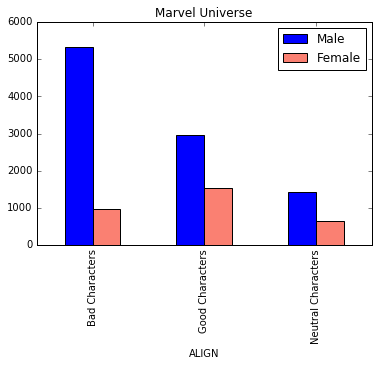

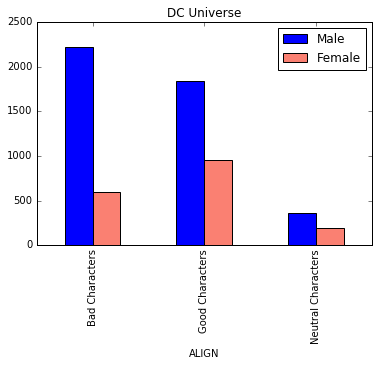

In [113]:
#plot the findings
marvel_goodbad.plot(kind='bar', color=['blue','salmon'],title='Marvel Universe')

dc_goodbad.plot(kind='bar', color=['blue','salmon'], title='DC Universe')

We can see that the Marvel and DC universes are each dominated by men. What may be surprising, however, is that in both franchises, bad men dominate the universe. On the female side, there are more good females than bad females. Perhaps comic book authors have found have 

Proportionally, DC has more equal representation of good vs bad characters, while Marvel has almost twice as many bad male characters as good male characters.

## Good, Evil, and Sexual Orientation


In [114]:
#Clean up and shape the Marvel dataframe

#Set Alignment to Index
marvel_gsm = marvel[['ALIGN','GSM']]
marvel_gsm=marvel_gsm.set_index('ALIGN')

#Create separate GSM columns
gsm = ['Hetero', 'Bisexual','Transvestites',
      'Homosexual','Pansexual',
      'Transgender','Genderfluid']
oldmarvel2 = marvel_gsm.copy()

onames=[]
for x in gsm:
    newname5 = x
    onames.append(newname5)
    marvel_gsm[newname5]=marvel_gsm['GSM'].str.contains(x)*1

marvel_orient=marvel_gsm[onames]
marvel_orient.head()

#summate indices into the common categories
marvel_orient=marvel_orient.groupby(marvel_orient.index).sum()

In [115]:
#Clean up and shape the DC dataframe

#Set Alignment to Index
dc_gsm = dc[['ALIGN','GSM']]
dc_gsm=dc_gsm.set_index('ALIGN')

#Create separate GSM columns
gsm = ['Hetero', 'Bisexual','Transvestites',
      'Homosexual','Pansexual',
      'Transgender','Genderfluid']
olddc2 = dc_gsm.copy()

onames2=[]
for x in gsm:
    newname4 = x
    onames2.append(newname4)
    dc_gsm[newname4]=dc_gsm['GSM'].str.contains(x)*1

dc_orient=dc_gsm[onames2]

#summate indices into the common categories
dc_orient=dc_orient.groupby(dc_orient.index).sum()

#drop Reformed Characters Column, as there are only 3 from the universe
dc_orient=dc_orient.drop('Reformed Criminals')

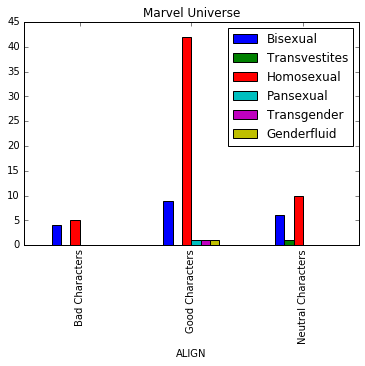

In [116]:
marvel_orient[[1,2,3,4,5,6]].plot(kind='bar',title='Marvel Universe')

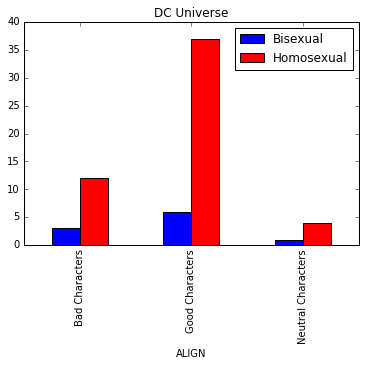

In [117]:
dc_orient[[1,3]].plot(kind='bar',color=('blue','red'),title='DC Universe')

Our findings here are pretty encouraging!  Non-heterosexual characters have not been disproportionately vilified in either Marvel or DC.

## Sexual Orientation in Comics Over the Years

We'll take a look at how many characters of each orientation were introduced in both Marvel and DC each year, and any trends that surfaces.

In [118]:
# We create a copy of the original dataframes to look at gender
GenderM = marvel.copy()
GenderDC = dc.copy()

In [119]:
# Clean up and shape the Marvel dataframe

# First, we'll drop those decimals from the years
GenderM["Year"] = GenderM["Year"].astype(str)
GenderM["Year"] = GenderM["Year"].str.replace(".0","")
GenderM["Year"] = GenderM["Year"].str.replace("nan","0")

# We also want to streamline the entries, removing "Characters"
# We'll assume any NaN values for orientation are "Heterosexual"
GenderM["SEX"] = GenderM["SEX"].str.replace(" Characters","")
GenderM["ALIGN"] = GenderM["ALIGN"].str.replace(" Characters","")
GenderM["GSM"] = GenderM["GSM"].str.replace(" Characters","")
GenderM["GSM"] = GenderM["GSM"].fillna("Heterosexual")

# Next, we pull out just the relevant columns
GenderM = GenderM[["name","ALIGN","SEX","GSM","Year"]]

# Here, we clean up the variable names
newheadings = ["Name","Alignment","Gender","Orientation","Year"]
GenderM.columns = newheadings

# We eventually want to view trends over time, so "Year" needs to become the index
GenderM = GenderM.set_index("Year")

In [120]:
# Clean up and shape the DC dataframe

# To make it look a little cleaner, we'll drop those decimals from the years
GenderDC["YEAR"] = GenderDC["YEAR"].astype(str)
GenderDC["YEAR"] = GenderDC["YEAR"].str.replace(".0","")
GenderDC["YEAR"] = GenderDC["YEAR"].str.replace("nan","0")

# We also want to streamline the entries, removing "Characters" from the columns we plan to use
# We'll assume any NaN values for orientation are "Heterosexual"
GenderDC["SEX"] = GenderDC["SEX"].str.replace(" Characters","")
GenderDC["ALIGN"] = GenderDC["ALIGN"].str.replace(" Characters","")
GenderDC["GSM"] = GenderDC["GSM"].str.replace(" Characters","")
GenderDC["GSM"] = GenderDC["GSM"].fillna("Heterosexual")

# Next, we pull out just the relevant columns
GenderDC = GenderDC[["name","ALIGN","SEX","GSM","YEAR"]]

# Let's clean up those column headings
newdcheadings = ["Name","Alignment","Gender","Orientation","Year"]
GenderDC.columns = newdcheadings

# We eventually want to view trends over time, so "Year" needs to become the index
GenderDC = GenderDC.set_index("Year")

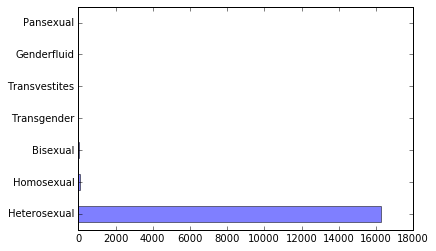

In [121]:
# A simple bar chart at this stage shows us the large outlier is skewing the scale; we'll get rid of it later
GenderM["Orientation"].value_counts().plot.barh(alpha=0.5)

In [122]:
# Now we need to change some of the text data to numbers so it is easier plot.  First, Marvel.

# Keeping the df GenderM available for other use, we create OrientationM to look specifically at sexual orientations in Marvel
OrientationM = GenderM.copy()
OrientationM = OrientationM.reset_index()

# The goal is to separate each orientation into its own column and assign 1s and 0s.
# First, we'll create new columns for each orientation and get rid of the existing one.
OrientationM["Heterosexual"] = OrientationM["Orientation"].copy()
OrientationM["Homosexual"] = OrientationM["Orientation"].copy()
OrientationM["Bisexual"] = OrientationM["Orientation"].copy()
OrientationM["Transgender"] = OrientationM["Orientation"].copy()
OrientationM["Genderfluid"] = OrientationM["Orientation"].copy()
OrientationM["Transvestite"] = OrientationM["Orientation"].copy()
OrientationM["Pansexual"] = OrientationM["Orientation"].copy()
OrientationM = OrientationM.drop("Orientation", 1)

# Now we want to convert the values in each orientation column to a 1 if it matches, a 0 if it does not
OrientationM["Heterosexual"] = OrientationM["Heterosexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[1,0,0,0,0,0,0])
OrientationM["Homosexual"] = OrientationM["Homosexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,1,0,0,0,0,0])
OrientationM["Bisexual"] = OrientationM["Bisexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,1,0,0,0,0])
OrientationM["Transgender"] = OrientationM["Transgender"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,1,0,0,0])
OrientationM["Genderfluid"] = OrientationM["Genderfluid"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,0,1,0,0])
OrientationM["Transvestite"] = OrientationM["Transvestite"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,0,0,1,0])
OrientationM["Pansexual"] = OrientationM["Pansexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,0,0,0,1])

# In preparation for plotting, we set "Year" as the index and sorted it
OrientationM = OrientationM.set_index("Year")
OrientationM = OrientationM.sort_index()

# Next, we want to group all the values for each year into sums to measure volume of exposure
OrientationM = OrientationM.groupby(OrientationM.index).sum()

In [123]:
# Now we need to change some of the text data to numbers so it is easier plot.  Now, DC.

# Keeping the df GenderM available for future use, we create OrientationDC to look specifically at sexual orientations in DC
OrientationDC = GenderDC.copy()

# Here again, we want to separate each orientation into its own column and assign 1s and 0s.
# First, we'll create new columns for each orientation and get rid of the existing one.
# This will look redundant at first, but we're gettinig there.
OrientationDC["Heterosexual"] = OrientationDC["Orientation"].copy()
OrientationDC["Homosexual"] = OrientationDC["Orientation"].copy()
OrientationDC["Bisexual"] = OrientationDC["Orientation"].copy()
OrientationDC["Transgender"] = OrientationDC["Orientation"].copy()
OrientationDC["Genderfluid"] = OrientationDC["Orientation"].copy()
OrientationDC["Transvestite"] = OrientationDC["Orientation"].copy()
OrientationDC["Pansexual"] = OrientationDC["Orientation"].copy()
OrientationDC = OrientationDC.drop("Orientation", 1)

# Now we want to convert the values in each orientation column to a 1 if it matches, a 0 if it does not
OrientationDC["Heterosexual"] = OrientationDC["Heterosexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[1,0,0,0,0,0,0])
OrientationDC["Homosexual"] = OrientationDC["Homosexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,1,0,0,0,0,0])
OrientationDC["Bisexual"] = OrientationDC["Bisexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,1,0,0,0,0])
OrientationDC["Transgender"] = OrientationDC["Transgender"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,1,0,0,0])
OrientationDC["Genderfluid"] = OrientationDC["Genderfluid"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,0,1,0,0])
OrientationDC["Transvestite"] = OrientationDC["Transvestite"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,0,0,1,0])
OrientationDC["Pansexual"] = OrientationDC["Pansexual"].replace(["Heterosexual","Homosexual","Bisexual","Transgender","Genderfluid","Transvestites","Pansexual"],[0,0,0,0,0,0,1])

# "Year" is already our index; but it needs to be sorted
OrientationDC = OrientationDC.sort_index()

# Next, we want to group all the values for each year into sums to measure volume of exposure
OrientationDC = OrientationDC.groupby(OrientationDC.index).sum()

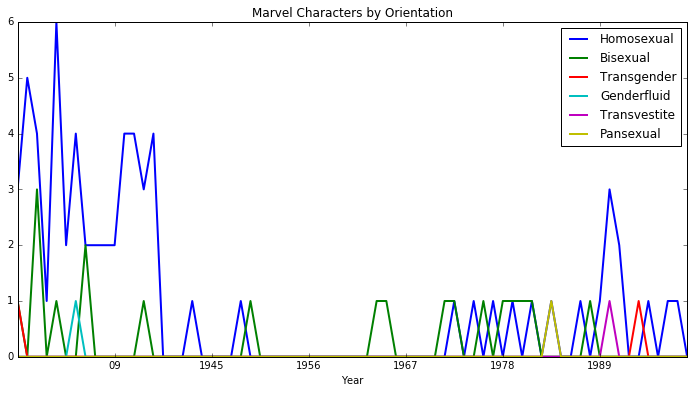

In [124]:
# In order to better see the granularity, we ignore the overwhelming "Heterosexual" values in the Marvel Universe
# Now let's see what it looks like!
# For clarity, we've also added a title and made the lines bolder so they are easier to see
OrientationM = OrientationM.drop("Heterosexual", 1)
OrientationM.plot(figsize=(12,6), title="Marvel Characters by Orientation", linewidth=2.0)

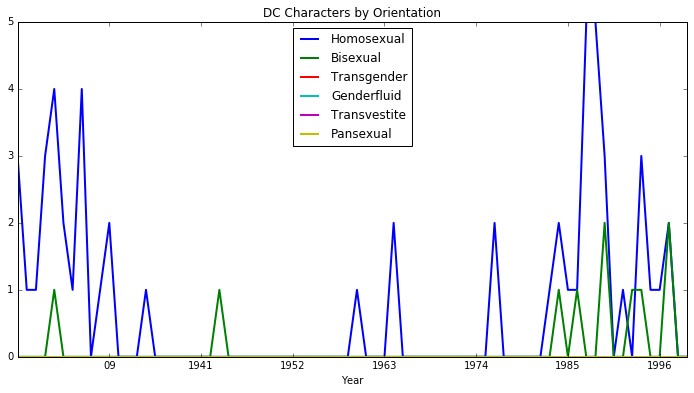

In [125]:
# In order to better see the granularity, we ignore the overwhelming "Heterosexual" values in DC
# Now let's see what it looks like!
# For clarity, we've also added a title and made the lines bolder so they are easier to see
OrientationDC = OrientationDC.drop("Heterosexual", 1)
OrientationDC.plot(figsize=(12,6), title="DC Characters by Orientation", linewidth=2.0)

A brief comparison of the two plots reveals that Marvel has introduced more variation in sexual identity over the years than DC.  To get a better idea, though, we'll want to look at them side by side.

## Comparing Representation in Marvel vs. DC

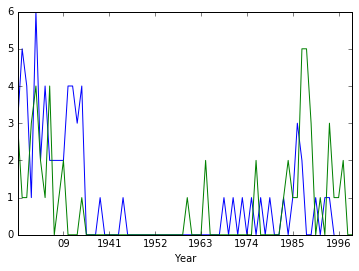

In [126]:
# Now we can compare the two franchises in combined plots
ax = OrientationM["Homosexual"].plot()
OrientationDC["Homosexual"].plot(ax=ax)

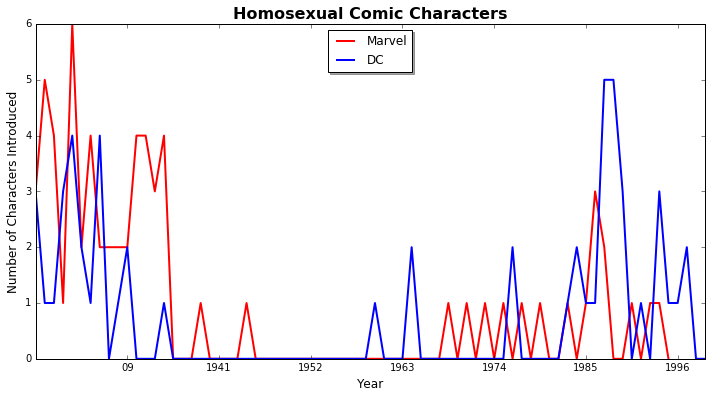

In [127]:
# Pretty powerful data, but we can make it look better
# By adding a title, axis labels, legend; changing the colors, and enlarging, we enhance the "Pow!" factor
ax = OrientationM["Homosexual"].plot(label="Marvel", color="red", linewidth=2.0)
OrientationDC["Homosexual"].plot(ax=ax, label="DC", figsize=(12,6), color="blue", linewidth=2.0)
ax.set_title("Homosexual Comic Characters", fontsize=16, fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Characters Introduced", fontsize=12)
legend = ax.legend(loc='upper center', shadow=True)

This shows us that Marvel introduced more homosexual characters as early as the 1940s, but DC has been more representative in recent years.

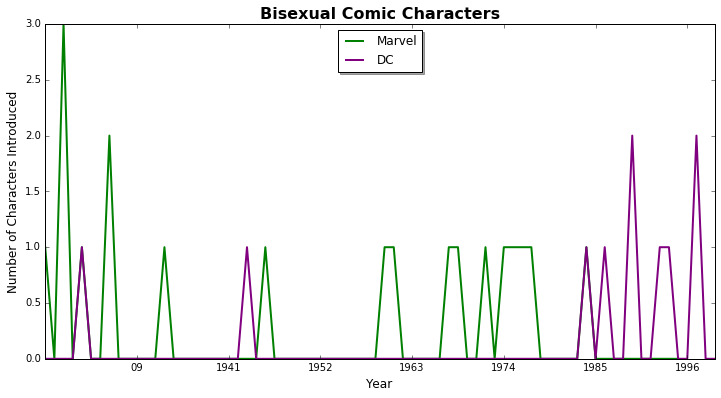

In [128]:
# We can go on to do this for any orientation
ax = OrientationM["Bisexual"].plot(label="Marvel", color="green", linewidth=2.0)
OrientationDC["Bisexual"].plot(ax=ax, label="DC", figsize=(12,6), color="purple", linewidth=2.0)
ax.set_title("Bisexual Comic Characters", fontsize=16, fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Characters Introduced", fontsize=12)
legend = ax.legend(loc='upper center', shadow=True)

When it comes to bisexual characters, it is harder to find a trend.  The two franchises seem to have ebbed and flowed in representation for this group.

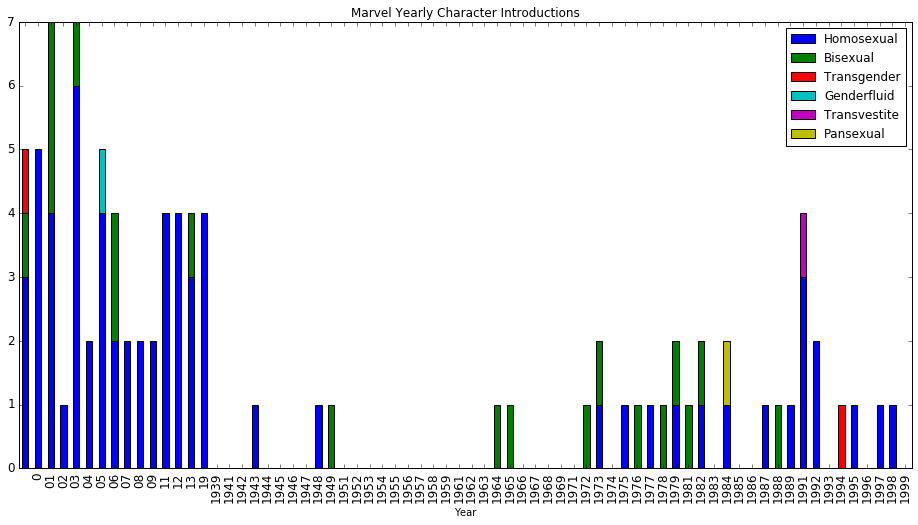

In [129]:
# We could also use a stacked bar chart to look at the array of introductions per year
OrientationM.plot.bar(stacked=True, figsize=(16,8), title="Marvel Yearly Character Introductions", fontsize=12)

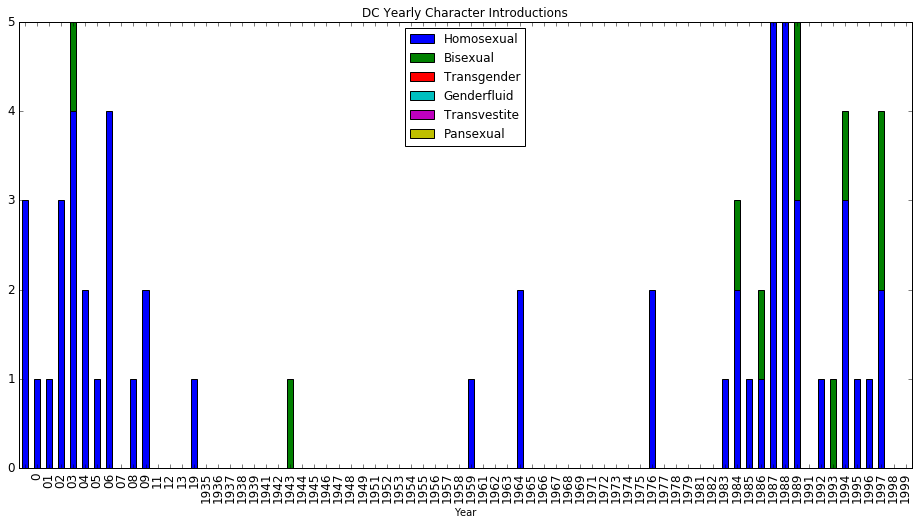

In [130]:
# Or the same thing for DC...
OrientationDC.plot.bar(stacked=True, figsize=(16,8), title="DC Yearly Character Introductions", fontsize=12)